## BANK CUSTOMER CHURN PREDICTION

In [1]:
#Importing necessary libraries for importing and visualizing the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Downloads/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#to identify the number of rows
len(data)

10000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Exploratory Data Analysis

In [5]:
#to check if there is any null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# to remove unwanted columns in the dataset
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [7]:
#descriptive statistics
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Visualization

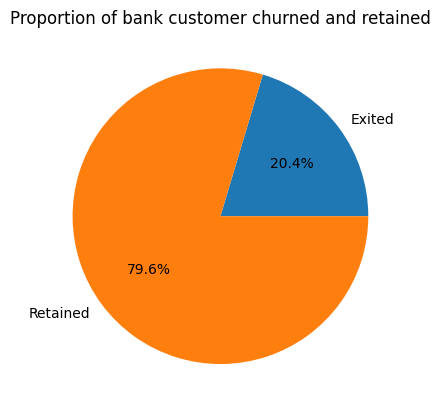

In [8]:
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Proportion of bank customer churned and retained")
plt.show()

From the above pie chart we can see that approximately 20% of the bank customers have churned and 80% haven't. 

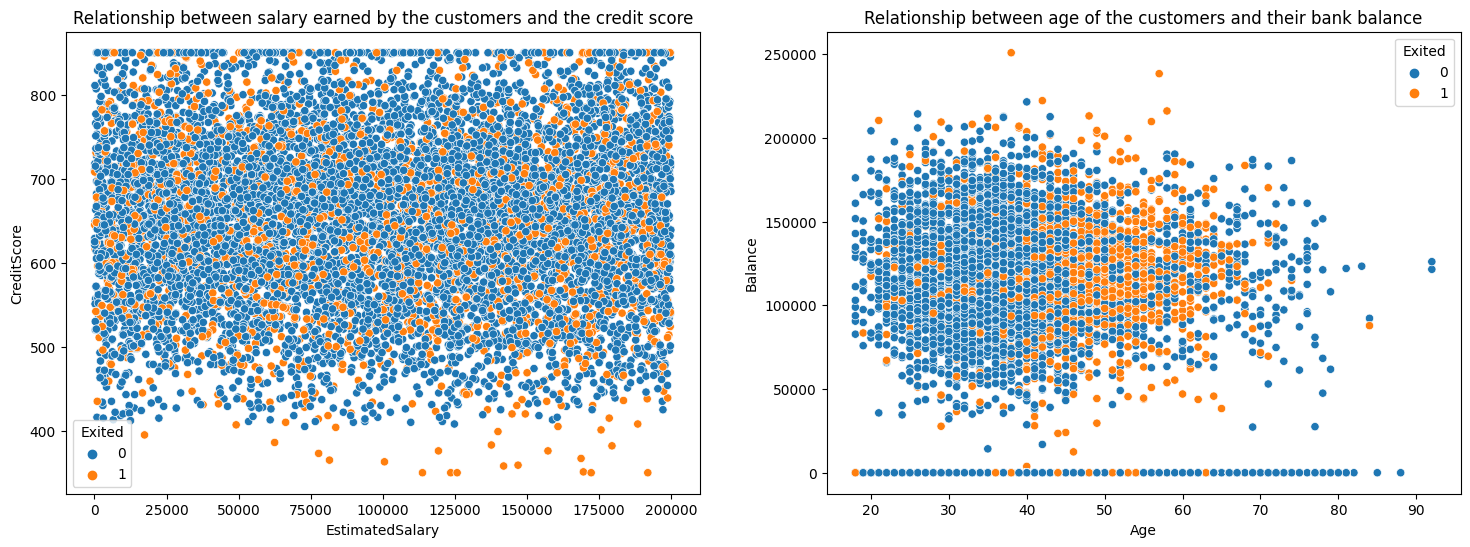

In [9]:
fig,axes=plt.subplots(1,2,figsize=(18,6))

sns.scatterplot(x=data['EstimatedSalary'],y=data['CreditScore'],hue=data['Exited'],ax=axes[0])
axes[0].set_title('Relationship between salary earned by the customers and the credit score')

sns.scatterplot(x=data['Age'],y=data['Balance'],hue=data['Exited'],ax=axes[1])
axes[1].set_title('Relationship between age of the customers and their bank balance')

plt.show()

From the above graphs, the following conclusions can be made:

customers with credit score of 400 and below have the history of churning,

credit score has no proper relation with the salary,

most of the customers from the age group of 40 to 70 years tend to churn.


<Axes: xlabel='NumOfProducts', ylabel='count'>

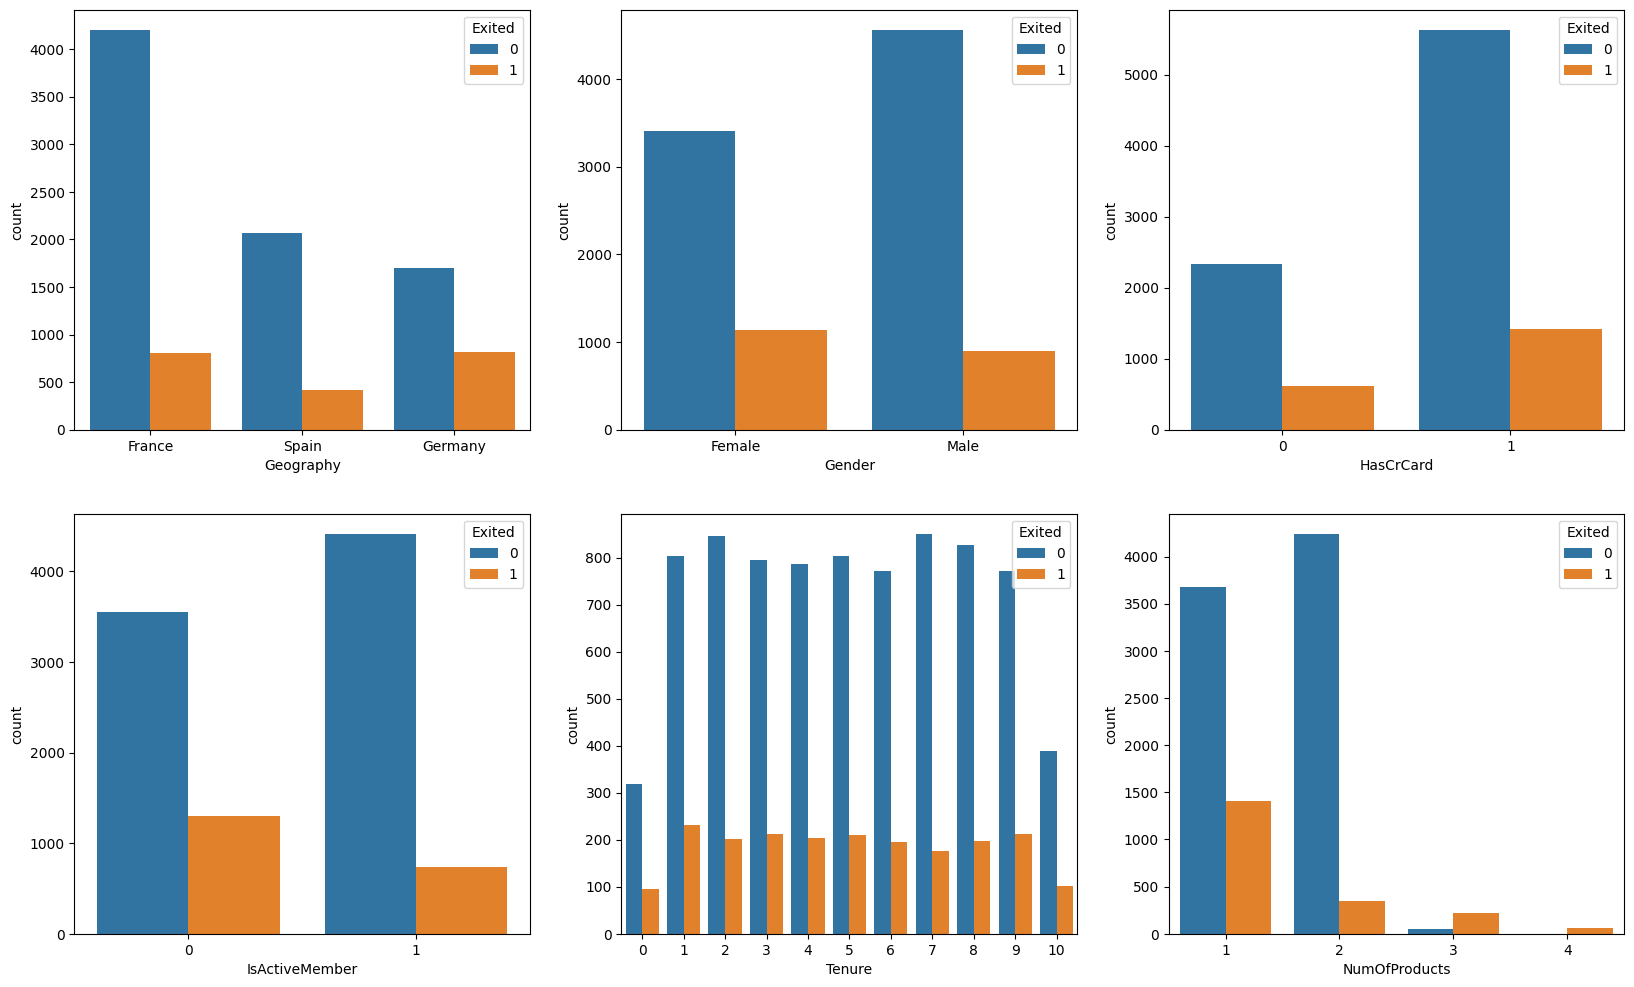

In [10]:
fig,axes=plt.subplots(2,3,figsize=(20,12))

sns.countplot(x='Geography',hue='Exited',data=data,ax=axes[0][0])
sns.countplot(x='Gender',hue='Exited',data=data,ax=axes[0][1])
sns.countplot(x='HasCrCard',hue='Exited',data=data,ax=axes[0][2])
sns.countplot(x='IsActiveMember',hue='Exited',data=data,ax=axes[1][0])
sns.countplot(x='Tenure',hue='Exited',data=data,ax=axes[1][1])
sns.countplot(x='NumOfProducts',hue='Exited',data=data,ax=axes[1,2])

From the above graphs, the following conclusions can be made:
    
Most of the customers of the bank belong to France

The churning rate is highest in Germany

Majority customers are male, however, the churning rate is highest in female compared to male bank customer

Customers who own a credit card have churned

The inactive members have greater churn

Majority of customers having tenure rate from 1 to 9 have churned

Customers who own just 1 product of bank have high churning rate

## Data Preprocessing

In [11]:
#One-hot encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['Geography']=label.fit_transform(data['Geography'])
data['Gender']=label.fit_transform(data['Gender'])

In [12]:
#Correlation
data.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

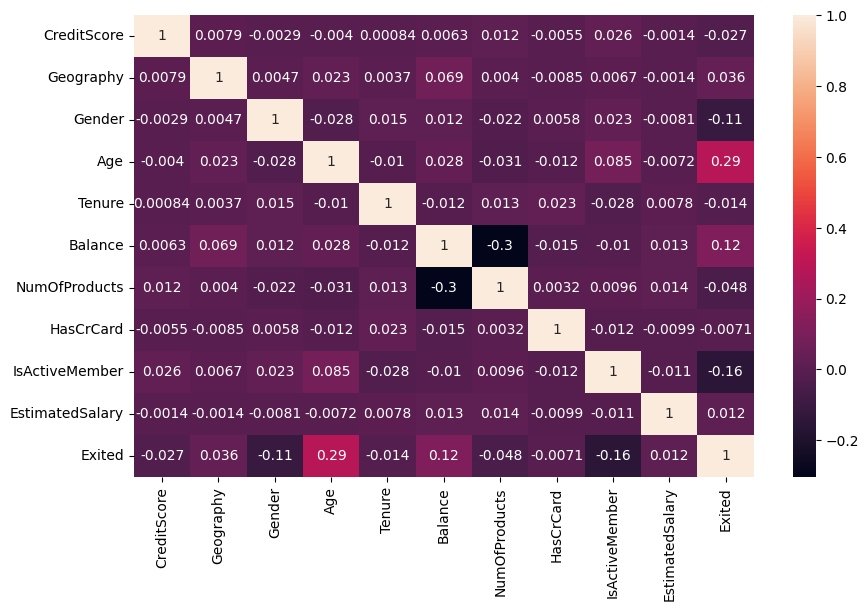

In [13]:
#Visualization of correlation
plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [14]:
#Scaling the dataset
features=data.drop('Exited',axis=1)
y=data.Exited
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(features)

## Prediction with ML models

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [16]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
len(x_train),len(x_test)

(8000, 2000)

The ML predictive models used includes- 

Logistic regrssion, 

K Nearest Neighbors,

Random Forest,

Suppot Vector Machine,

Naive Bayes,

Neural Network

The accuracy score, confusion matrix and classification report are prepared for each model to compare the performance. 

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)

#Train score
reg_train_score=accuracy_score(y_train,reg.predict(x_train))
reg_train_score

0.807125

In [19]:
#Test score
reg_test_score=accuracy_score(y_test,reg.predict(x_test))
reg_test_score

0.815

Confusion Matrix:
[[1559   48]
 [ 322   71]]


Text(50.722222222222214, 0.5, 'Truth')

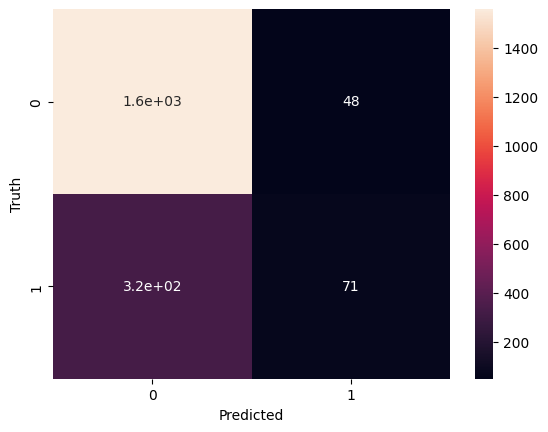

In [20]:
#confusion matrix
matrix=confusion_matrix(y_test,reg.predict(x_test))
print('Confusion Matrix:')
print(matrix)

sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
#Classification report
print(classification_report(y_test,reg.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## K Nearest Neighbour

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

#Train score
knn_train_score=accuracy_score(y_train,knn.predict(x_train))
knn_train_score

0.877625

In [23]:
#Test score
knn_test_score=accuracy_score(y_test,knn.predict(x_test))
knn_test_score

0.835

Confusion Matrix:
[[1519   88]
 [ 242  151]]


Text(50.722222222222214, 0.5, 'Truth')

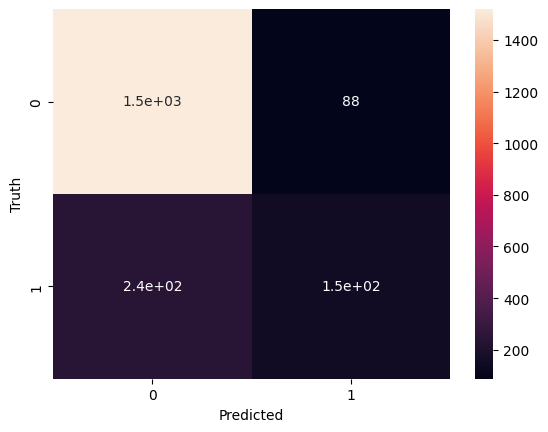

In [24]:
#confusion matrix
matrix=confusion_matrix(y_test,knn.predict(x_test))
print('Confusion Matrix:')
print(matrix)

sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
#Classification report
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.63      0.38      0.48       393

    accuracy                           0.83      2000
   macro avg       0.75      0.66      0.69      2000
weighted avg       0.82      0.83      0.82      2000



## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

#Train score
rf_train_score=accuracy_score(y_train,rf.predict(x_train))
rf_train_score

1.0

In [27]:
#Test score
rf_test_score=accuracy_score(y_test,rf.predict(x_test))
rf_test_score

0.868

Confusion Matrix:
[[1555   52]
 [ 212  181]]


Text(50.722222222222214, 0.5, 'Truth')

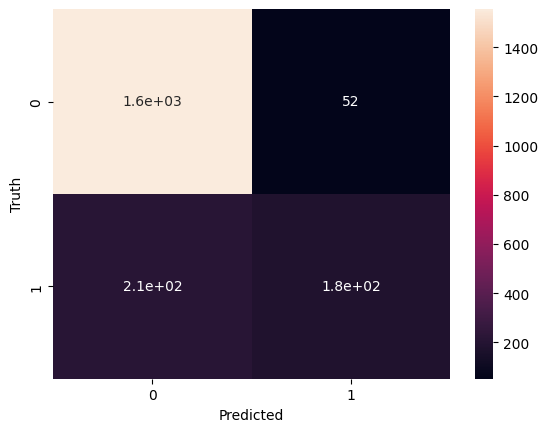

In [28]:
#confusion matrix
matrix=confusion_matrix(y_test,rf.predict(x_test))
print('Confusion Matrix:')
print(matrix)

sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
#Classification report
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



## Support Vector Machine (SVM)

In [30]:
from sklearn.svm import SVC
vector=SVC()
vector.fit(x_train,y_train)

#Train score
vector_train_score=accuracy_score(y_train,vector.predict(x_train))
vector_train_score

0.862625

In [31]:
#Test score
vector_test_score=accuracy_score(y_test,vector.predict(x_test))
vector_test_score

0.8575

Confusion Matrix:
[[1571   36]
 [ 249  144]]


Text(50.722222222222214, 0.5, 'Truth')

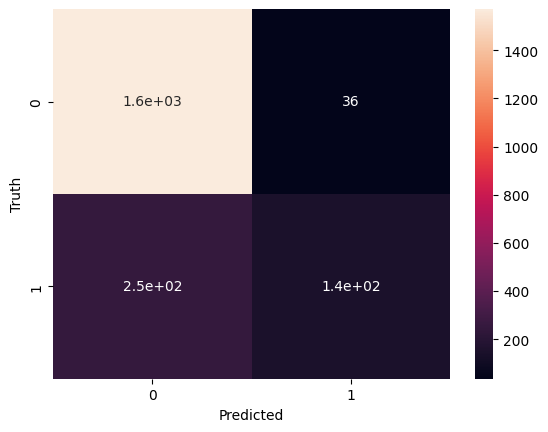

In [32]:
#confusion matrix
matrix=confusion_matrix(y_test,vector.predict(x_test))
print('Confusion Matrix:')
print(matrix)

sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
#Classification report
print(classification_report(y_test,vector.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.80      0.37      0.50       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



## Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

#Train score
nb_train_score=accuracy_score(y_train,nb.predict(x_train))
nb_train_score

0.829875

In [35]:
#Test score
nb_test_score=accuracy_score(y_test,nb.predict(x_test))
nb_test_score

0.8285

Confusion Matrix:
[[1563   44]
 [ 299   94]]


Text(50.722222222222214, 0.5, 'Truth')

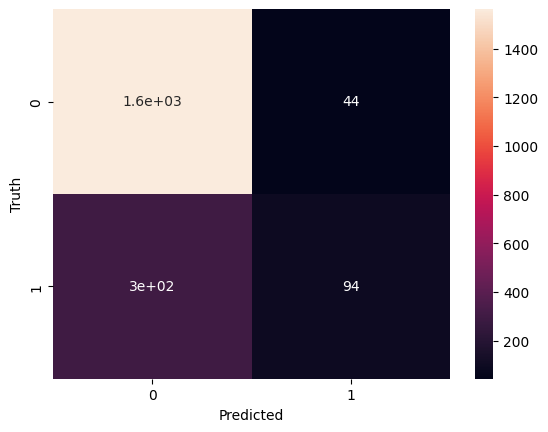

In [36]:
#confusion matrix
matrix=confusion_matrix(y_test,nb.predict(x_test))
print('Confusion Matrix:')
print(matrix)

sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
#Classification report
print(classification_report(y_test,nb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1607
           1       0.68      0.24      0.35       393

    accuracy                           0.83      2000
   macro avg       0.76      0.61      0.63      2000
weighted avg       0.81      0.83      0.79      2000



## Neural Network

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [39]:
model=Sequential()
model.add(Dense(units=14,activation='relu',input_shape=(10,)))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [40]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')

In [41]:
model.fit(x_train,y_train,epochs=200,batch_size=32,validation_data=(x_test,y_test),verbose=0)

In [42]:
train_y_predicted = model.predict(x_train)
train_y_predicted=[0 if val<0.5 else 1 for val in train_y_predicted]

250/250 [==============================] - 1s 2ms/step


In [43]:
test_y_predicted=model.predict(x_test)
test_y_predicted=[0 if val<0.5 else 1 for val in test_y_predicted]

63/63 [==============================] - 0s 2ms/step


In [44]:
#train score
tf_train_score=accuracy_score(y_train,train_y_predicted)
tf_train_score

0.863625

In [45]:
tf_test_score=accuracy_score(y_test,test_y_predicted)
tf_test_score

0.862

Confusion Matrix:
[[1563   44]
 [ 299   94]]


Text(50.722222222222214, 0.5, 'Truth')

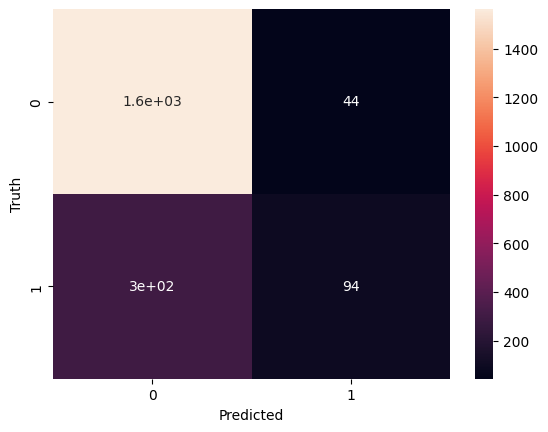

In [46]:
#confusion matrix
confusion_matrix(y_test,test_y_predicted)
print('Confusion Matrix:')
print(matrix)

sns.heatmap(matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
#Classification report
print(classification_report(y_test,test_y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



## COMPARING THE MODELS

In [48]:
models = pd.DataFrame({
    'model': ['log','knn','rf','svc','nb','tf_model'],
    'train_score': [reg_train_score,knn_train_score,rf_train_score,vector_train_score,nb_train_score,tf_train_score],
    'test_score': [reg_test_score,knn_test_score,rf_test_score,vector_test_score,nb_test_score,tf_test_score]
})

In [49]:
models

,model,train_score,test_score
0,log,0.807125,0.8150
1,knn,0.877625,0.8350
2,rf,1.000000,0.8680
3,svc,0.862625,0.8575
4,nb,0.829875,0.8285
5,tf_model,0.863625,0.8620


In [51]:
models.sort_values('test_score',ascending=False)

,model,train_score,test_score
2,rf,1.000000,0.8680
5,tf_model,0.863625,0.8620
3,svc,0.862625,0.8575
1,knn,0.877625,0.8350
4,nb,0.829875,0.8285
0,log,0.807125,0.8150


## CONCLUSION

By comparing the performance of all the ML models, we can come to a conclusion that the best model which gives the highest accuracy and a descent precision and recall is Random Forest with an accuracy score of 86.80%, precision (on 1) of 0.78 and recall (on 1) of 0.46. 